# Exercise: Estimating $\pi$ by playing Darts

Let's use the power of NumPy to work on a very long-standing problem: finding a numerical approximatopn for the numper $\pi$. Pi is the ratio of a circle's circumference to its diameter and people have tried for [thousands of years](https://en.wikipedia.org/wiki/Approximations_of_%CF%80#:~:text=Zu%20Chongzhi%20is%20known%20to,accurate%20as%20his%20decimal%20result.) to compoute its value to the highest accuracy possible. We are going to try to find our own numerical solution to estimate $\pi$ now and we are doing this by simply playing darts!

![](../assets/dartboard_schematic.png) 

## Mathematical background
We are going to make use of the fact that we are actually not very good at playing darts! We start by putting a blue square behind and around our green dartboard to protect our wall like in the above schematic. We are really bad at this, so every dart we throw will allways land at some random point within the square above. Sometimes we will even hit the actual green dartboard. Hooray! After some (very long) time we notice that the overall probability at which our darts land within the green area is actually not random but seems to converge to a fixed number. The math guy in the group points out that we can actually use our pathetic display to estimate $\pi$. But whow?

Since our throws are totally random, the probability of a single dart landing in the green circle is actually given by the ratio of the circle's area compared to that of the surrounding square, or:

$$ p_{circle} = \frac{A_{circle}}{A_{square}} = \frac{\pi*r^2}{(2*r)^2}$$

We can actually measure $p_{circle}$ by just keeping track of how many darts of our total land within the green circle. So we can write:

$$ \frac{N_{circle}}{N_{total}} \approx \frac{\pi*r^2}{(2*r)^2} = \frac{\pi}{4}$$

with $N_{circle}$ being the number of darts landing in the green circle and $N_{total}$ the total number of darts thrown and landing anywhere within the square. So along our game of Darts we can simply keep counting the number of darts that land in the circle and estimate $\pi$ by:

$$ \pi \approx \frac{N_{circle}}{N_{total}} * 4$$

## Exercise 1
Write some code that simulates throwing $N_{total}$ = 100,000 darts that land randomly within the square. For each throw, check whether the dart lands within the green circle and use the ratio of this count to the total number of thrown darts to calculate an estimate of $\pi$. For simplicity, start by implementing the simulation with a loop over each of the 100,000 throws. Keep track of your current estimate of $\pi$ after each throw and plot the results. 

Hints:
- you can use the `np.random.rand(N, 2)` to simulate the random dart positions on the square
- assume that the (x, y) coordinates of the centre of the circle are (0, 0) and each dart's x and y coordinate should fall between [-1,1], respectively (you can modify the output of `np.random.rand(N, 2)` to achieve this)
- you can then loop over the dart positions and check whether a dart lands within the circle with $\sqrt{x^2 + y^2} < 1$
- use a matplotlib line plot to visualise the result with the umber of throws on the x-axis and the running estimate of $\pi$ on the y-axis
- add a horizontal line for your target value of $\pi$

In [68]:
# Write your exercise code here.

import numpy as np

# number of throws
N_total = 100_00

# random dart positions
positions = np.random.rand(N_total, 2)

# x and y should be between [-1, 1]
positions = positions*2 - 1

# loop over each thrown dart, check if it is within circle
# if so, increase count, otherwise repeat old count
count_circle = [0]
for x_pos, y_pos in positions:
    if np.sqrt(x_pos**2 + y_pos**2 < 1):
        count_circle.append(count_circle[-1] + 1)
    else:
        count_circle.append(count_circle[-1])

# loop over each throw and keep track of current pi estimate
pi_estimate = []
for n_thrown, n_circle in enumerate(count_circle):
    if n_thrown > 0:
        pi_estimate.append(4*n_circle/n_thrown)

# print last 100 values for quick check
print(pi_estimate[-100:])
    

[3.1697808302191697, 3.169864673803272, 3.169544582449763, 3.1696284329563813, 3.1697122665320547, 3.1693922875025238, 3.16947612799031, 3.1695599515542994, 3.1696437581996166, 3.1697275479313824, 3.1694077287861973, 3.16908797417272, 3.1687682840714215, 3.1688521283034095, 3.1685325264750377, 3.1682129891085116, 3.168296863970959, 3.167977414801371, 3.1680612965016635, 3.167741935483871, 3.1678258240096766, 3.167909695625882, 3.1679935503375996, 3.1680773881499396, 3.16816120906801, 3.168245013096917, 3.1683288002417647, 3.168412570507655, 3.1684963238996877, 3.168580060422961, 3.1686637800825697, 3.1687474828836084, 3.168831168831169, 3.1689148379303402, 3.168595873175642, 3.168679549114332, 3.168763208211734, 3.1688468504729324, 3.1685280209276585, 3.1686116700201206, 3.1686953022834725, 3.168778917722792, 3.168862516343156, 3.168946098149638, 3.16902966314731, 3.1687110396139153, 3.1687946114406356, 3.168476075593084, 3.1681576037792745, 3.168241206030151, 3.1683247914782435, 3.168

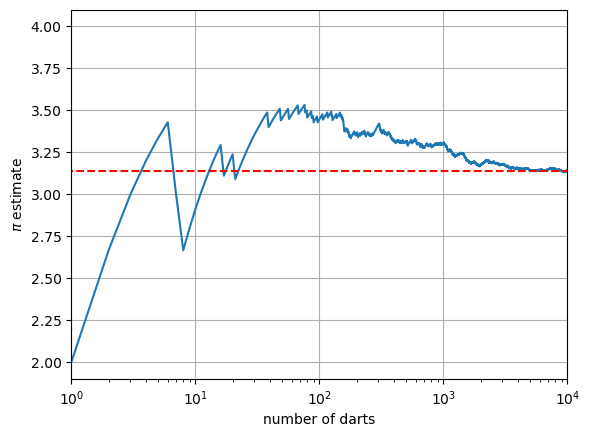

In [81]:
# plot the results

import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# plot estimate and target value of pi
ax.plot(np.arange(0, N_total), pi_estimate);
ax.hlines(xmin=0, xmax=N_total, y=np.pi, color="r", linestyles="--")

# labeling
ax.set_ylabel(r"$\pi$ estimate")
ax.set_xlabel("number of darts")

ax.set_xlim([1,N_total])
ax.grid(True)

# log scale for better visability
ax.set_xscale("log")


# Exercise 2
The solution above works fine, but let's try to use NumPy to vectorise our code and therefore make it quicker and more easily extensible for the future. So the task is quite simple: Modify your code from above to get the same output, but without using any loop at all!

Hints:
- use NumPy to calculate the distance from the center for all dart positions with a single command
- you can apply arithmetics like powers or square roots to whole arrays and need to sum along an axis to reduce the dart positions array from shape (N, 2) to (N,)
- similarly, you can use boolean indexing on an array to find those distances that are < 1
- if you make use of the fact that `True` behaves like `1` and `False` behaves like `0`, you can calculate the cumulative sum with the [np.cumsum function](https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html)
- again, check the results by plotting them

In [92]:
# Write your exercise code here.

# number of throws
N_total = 100_00

# random dart positions
positions = np.random.rand(N_total, 2)

# x and y should be between [-1, 1]
positions = positions*2 - 1

positions_squared = positions**2
distance_to_centre = np.sqrt(positions_squared.sum(axis=1))

within_circle_flag = distance_to_centre < 1

count_circle = np.cumsum(within_circle_flag)
num_thrown = np.arange(1, N_total+1) # 1, 2, ..., N

pi_estimate_vectorised = 4 * count_circle / num_thrown


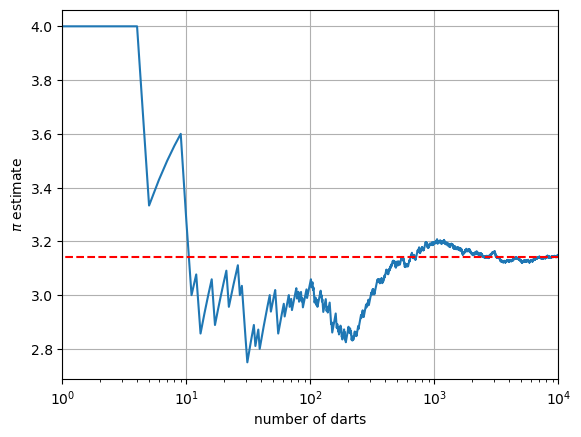

In [93]:
# plot the results

import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# plot estimate and target value of pi
ax.plot(np.arange(0, N_total), pi_estimate_vectorised);
ax.hlines(xmin=0, xmax=N_total, y=np.pi, color="r", linestyles="--")

# labeling
ax.set_ylabel(r"$\pi$ estimate")
ax.set_xlabel("number of darts")

ax.set_xlim([1,N_total])
ax.grid(True)

# log scale for better visability
ax.set_xscale("log")


# Exercise 3
If you re-run your solutions from above you will notice that you will get a different shape of your curve each time. This is expected, but it would be nice to actually account for this random behaviour by attaching an uncertainty to each of our $\pi$ estimates along our simulation. You could manually re-run your code 10, 100 or 1000 times and calculate the mean and standard deviation across your results. But you would probably agree, that this is a quite tedious process. Instead, your task is to adjust your code from above to simply add another dimension to your array of dart positions that represents the individual trials (or realisations) of your experiments. Implement M = 100 trials of your simulation and finally plot the mean and uncertainty envelope of your $\pi$ estimate.

Hints:
- you can easily add a dimension M to your array of dart positions, so instead of generating (N, 2) dart positions, you will create (M, N, 2) positions now
- slightly adjust your code so that you now calculate (M,N) instead of (N,) estimates of $\pi$
- you can now calculate the mean and standard deviation along the M dimension
- plot the results and use the [fill_between](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.fill_between.html) command to add an uncertanty shading around your mean
- try to estimate the time (e.g. via the [timeit magic command](https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-timeit)) it would take to run your code from exercise 1 for 100 times compared to the execution time of your fully vectorised solution in exercise 3

In [96]:
# Write your exercise code here.

# number of throws
N_total = 100_00

# number of trials for experiments
M_total = 100

# random dart positions
positions = np.random.rand(M_total, N_total, 2)

# x and y should be between [-1, 1]
positions = positions*2 - 1

positions_squared = positions**2
distance_to_centre = np.sqrt(positions_squared.sum(axis=2))

within_circle_flag = distance_to_centre < 1

count_circle = np.cumsum(within_circle_flag, axis=1)
count_thrown = np.arange(1, N_total+1) # 1, 2, ..., N

pi_estimate_trials = 4 * count_circle / num_thrown


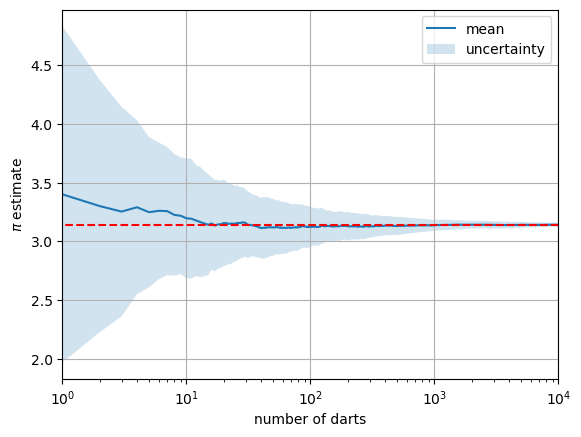

In [97]:
# plot the results

mean_estimate = pi_estimate_trials.mean(axis=0)  # average over trials
std_estimate = pi_estimate_trials.std(axis=0)     # standard deviation across trials

import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# plot estimate and target value of pi
ax.plot(count_thrown, mean_estimate, label='mean');
ax.fill_between(count_thrown, y1=mean_estimate-std_estimate, y2=mean_estimate+std_estimate, alpha=0.2, label="uncertainty")
ax.hlines(xmin=0, xmax=N_total, y=np.pi, color="r", linestyles="--")

# labeling
ax.set_ylabel(r"$\pi$ estimate")
ax.set_xlabel("number of darts")

ax.set_xlim([1,N_total])
ax.grid(True)

# log scale for better visability
ax.set_xscale("log")

ax.legend();

### Credits
The idea and solutions for this exercise are adapted from [https://www.pythonlikeyoumeanit.com/Module3_IntroducingNumpy/Problems/Approximating_pi.html](https://www.pythonlikeyoumeanit.com/Module3_IntroducingNumpy/Problems/Approximating_pi.html). Have a look at the other examples on the page or the general introduction to Python basics if you like.

## [[Previous: Overview](../week_05_geospatial_data.ipynb)] | [[Next: Conda environments](./02-conda.ipynb)]